<a href="https://colab.research.google.com/github/6X10/advanced-statistical-data-analysis/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(4242)

In [ ]:
# data generation set-up
# we will assume that our data is sampled from 3 Gaussians

#2-dim space에서
pi_true = np.array([0.2,0.5,0.3]) #2:3:5 비율로 각 가우시안에서 데이터 추출할 것
mu_true = np.array([[2,2],[-1,-1],[0,-1.4]]) #각 가우시안 분포의 mu 값
sigma_true = np.zeros((3,2,2)) #각 가우시안 분포의 sigma 값 (covariance matrix)
sigma_true[0] = np.array([[1.,0.3],[0.2,0.2]])
sigma_true[1] = np.array([[0.5,0.8],[0.8,0.5]])
sigma_true[2] = np.array([[1.3,0.3],[0.2,0.4]])

#우리는 어디서 데이터 생성됐는지 아니까, 이를 표현하기 위해서 색 지정
colors = sns.color_palette("husl",8)
col = [colors[0],colors[1],colors[3],colors[5],colors[7]] #3개의 가우시안에서 뽑았지만, 5개의 cluster 가정할 것. 이를 활용해서 plotting
cols = ['b','g','r'] #파,초,빨

In [ ]:
# generate N=100 data instances

N = 100 #데이터 개수
data = np.zeros((N,3)) #X,Y,true color(실제로 어떤 가우시안 분포에서 나왔는지)

In [ ]:
# data generation

for i in range(N):
    z = np.random.random()
    idx = 0
    interval = 0

    for j in range(len(pi_true)):
        if z >= interval and z <= interval+pi_true[j]:
            idx = j
            break
        else:
            interval += pi_true[j]

    x, y = np.random.multivariate_normal(mu_true[idx],sigma_true[idx])
    data[i] = (x,y,idx)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


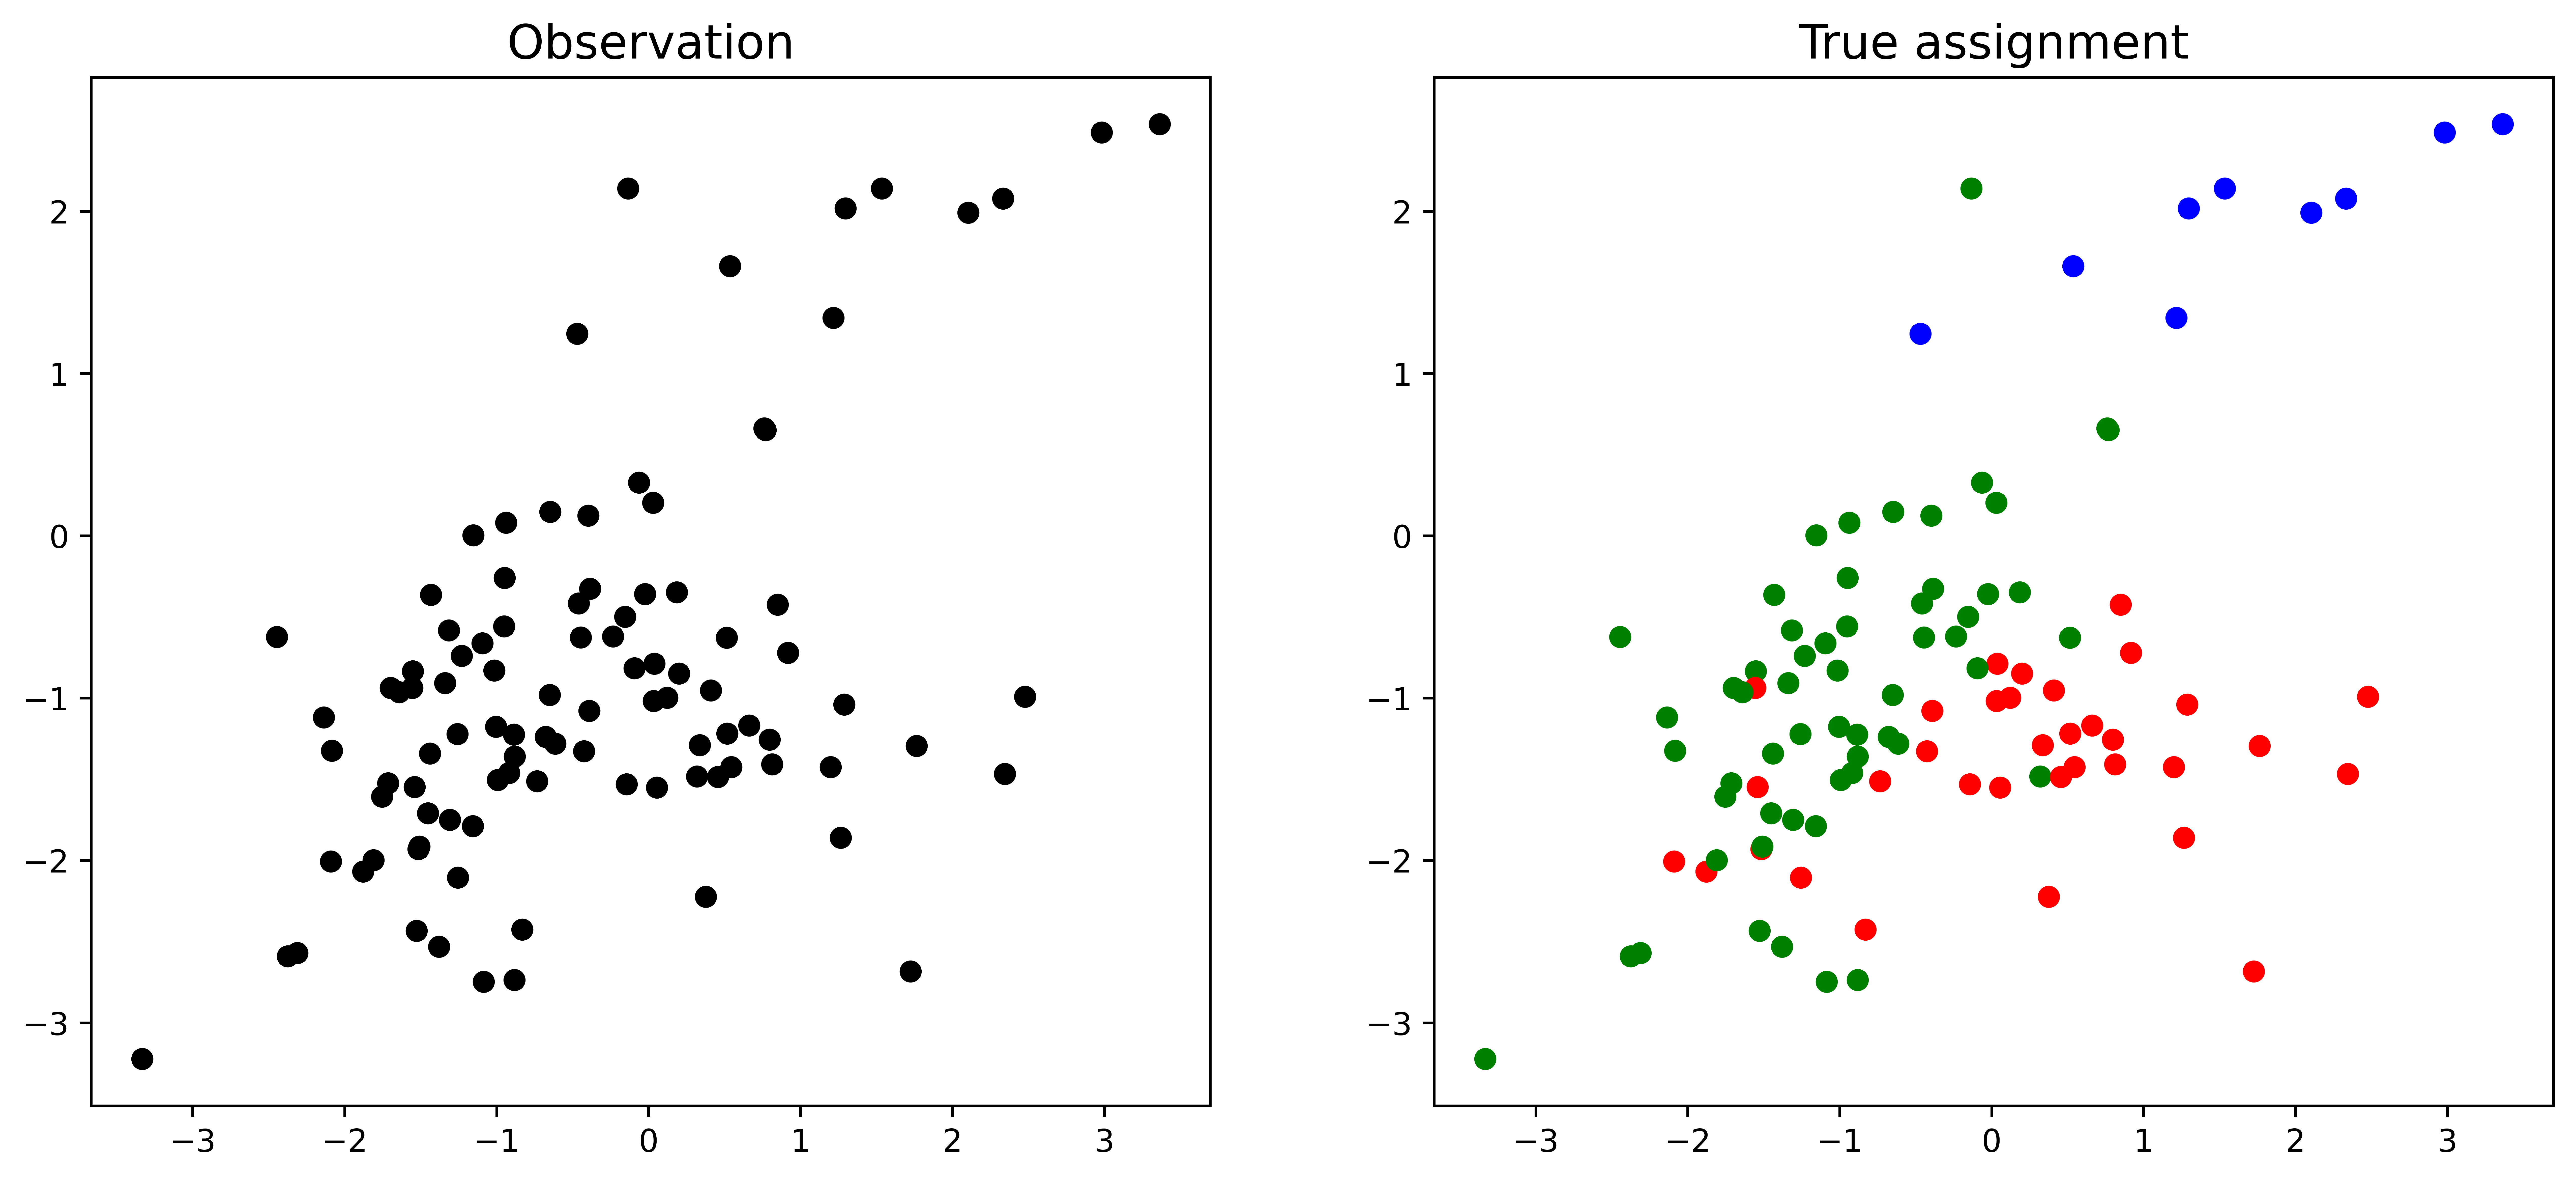

In [ ]:
# plot generated data

plt.figure(1,figsize=(14,6),dpi=900)

#우리가 실제 들고 있는 데이터는 이럼. 이 데이터 어디서부터 왔는지 모름. (unsupervised learning 하고 있으니까)
plt.subplot(121)
plt.title('Observation',fontsize=15)
plt.plot(data[:,0],data[:,1],'ko')

plt.subplot(122)
plt.title('True assignment',fontsize=15) #데이터를 만들었으니까 알고 있는 true label
for i in range(N):
    plt.plot(data[i,0],data[i,1],'o',c=cols[int(data[i,2])])

plt.show()

In [ ]:
# k-means clustering is based on Euclidean distance

def distance(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [ ]:
# assume k=5 clusters

k = 5
itrEM = 128 #128번의 update 진행 예정
showVisualization = [1,3,7,15,31,63,127] #iteration 내에서 2의 거듭제곱마다 진행상황 visualize

In [ ]:
# set-up numpy zero tables
# you need to complete the following variables in this implementation (매 step마다 구해야하는 것)

centroid = np.zeros((itrEM,k,2)) #각 iteration마다 5개의 centroid 좌표 어디있는지
sumDistance = np.zeros(itrEM-1) #각 iteration마다 total distance
assignment = np.zeros(N,dtype=np.int64) #각 데이터가 어느 cluster에 assign 되어 있는지
#centroid와 sumDistance는 각 iteration 개수만큼 채우는데, assignment는 그냥 그때그때마다 수정하면 되는 벡터로 생각. (굳이 누적해서 추적할 필요X. 추적할 수 있도록 visualization 부분에 포함됨.)

In [ ]:
# 튜플 해제(*을 통해서 unpacking을 할 수 있음 )

print(*centroid[0,:,:].shape)
print(centroid[0,:,:].shape)

5 2
(5, 2)


In [ ]:
# randomly intialize centroids with std. Gaussian
# but you can also use initial centroids by choosing from data instances -> 원하는 방향으로 구현

centroid[0,:,:] = np.random.randn(*centroid[0,:,:].shape) #(k,2) : 우리가 데이터 포인터가 0,0 근처에 있다는 걸 아니까 시도해볼 수ㅇ (만약 0,0 아니라면 안 좋은 initialize일 수ㅇ)

# for i in range(k):                  #조금 더 안전하게(데이터 반영 했으므로) 들고 있는 observation들 중에서 k=5개 (random하게) 뽑아도 됨. 이 경우에는 앞에 있는 5개 가져온 것이지만. 더 안전하려면 random shuffling해서 뽑아야함.
#  centroid[0, i, :] = data[i, :2]

print(centroid[0, :, :])

[[-0.38134639  0.09705246]
 [ 0.41191621 -1.52335192]
 [ 0.73325358  1.36680798]
 [ 0.01369281  0.0632325 ]
 [ 0.69670342 -0.25974616]]


In [ ]:
plt.figure(1,figsize=(14,25),dpi=900)
plotN = 1
delta = 1e-10

# training starts from here

for i in range(1,itrEM): #학습 128번

    ############ E-step: update cluster assignments given centroids(=centroids assignments constant)
    #각각의 데이터에 대해서 distance minimum인 centroid 찾아서 그것의 index를 assign 해야함. 밑은 pseudo code
    #Find i in range(N):
    # ASDFASDF
    # distance(data,centroid)
    # for i j in range(K):
    #   distance(d,c) #데이터와 centroid 간의 distance 구해야.
    # find min-centroid and assign the index

    #### HERE ####
    for j in range(N): #모든 데이터 point에 대해서 가장 가까운 centroid 찾아야 함.
      idxK = 0
      #centroid = np.zeros((itrEM,k,2))이므로, 0번째 centroid와의 데이터간의 거리 구해서 이것을 현재의 distance 값이라고 생각하고, 이거보다 더 작은 distance 나온 centroid 나오면 이걸 업데이트 하는 과정
      minDist = distance(centroid[i-1, 0, :], data[j,:2])

      for l in range(1, k): #j번째 데이터에서 k개의 cluster 중에서 가장 가까운 centroid 하나 찾아야 하므로
        dist = distance(centroid[i-1, l, :], data[j,:2])

        if minDist > dist:
          minDist = dist
          idxK = l
      assignment[j] = idxK
      sumDistance[i-1] += distance(centroid[i-1, idxK, :], data[j, :2]) #최종적으로 채택된 centroid assignment 저장된 cluster index 활용해서 그 centroid의 좌표랑, j번째 데이터 좌표를 이용해서 거리 누적합 계산해준다

    ############ E-step ends here

    cntGroups = np.zeros(k)+delta  #M step에서 각각의 cluster에 몇 개의 데이터 할당 되었는지 정보 활용하므로, k-dimension짜리 variable 생성
    #추가적으로 고려해야할 것: 각각의 centroid에 assign된 data의 개수. np.zeros로 initialize 해주고 (어차피 평균 내줘야 하니까)

    ############ M-step: update centroids given cluster assignments(=cluster assignments constant)

    #해당 cluster에 해당된 점들의 average 구하면 됨 (pseudo code)
    ##k개의 centroid의 x,y좌표를 누적해서 더할 것. 그러기 위해서 (k,2) zero vector initialize 해서 거기다가 누적합 더하기
    #sumDistanceCentroid = np.zeros((k,2),dtype=float)
    #for i in range(N):
    #   sumCoordinateCentroid[assignment[i]] += data[i,:2]

    #for j in range(k):
    #   new_centroid[j] = compute average for data assigned in cluster j #j번째 centroid에 assign된 데이터의 average 구하기
    #   new_centroid[j] = sumCoordinateCentroid[j]/cntGroups[j]

    #### HERE ####
    for j in range(N):
      cntGroups[assignment[j]] += 1 #실제로 그 데이터가 어떤 그 데이터가 어떤 centroid에 assign 되었는지 확인하고, 해당 centroid의 count +1
      centroid[i, assignment[j]] += data[j, :2] #centroid의 좌표를 누적한 다음 나눠주는 작업 하겠다. 좌표값들 데이터 활용해서 누적한 다음에 나중에 나눠주겠다. (실제로 해당 데이터에 대해서 데이터의 좌표값 누적해서 더한 다음에, 해당 centroid 개수로 나눠줌)

    for j in range(k):
      centroid[i, j] /= cntGroups[j]

    ############ M-step ends here

    if i in showVisualization: #iteration에 따라 centroid 어떻게 변해가는지 보여줌.
        plt.subplot(len(showVisualization),2,plotN)
        plt.title('iteration = %s'%(i),fontsize = 15)
        plotN += 1

        for j in range(k):

            points = np.zeros((int(cntGroups[j]),2))
            cntTemp = 0

            for l in range(N):
                if assignment[l] == j:
                    points[cntTemp] = data[l,:2]
                    cntTemp += 1

            plt.plot(points[:,0],points[:,1],'x',markeredgecolor=col[j],markeredgewidth=1)
            plt.plot(centroid[0:i,j,0],centroid[0:i,j,1],'ko',markeredgecolor=col[j],markerfacecolor='k')
            plt.plot(centroid[0:i,j,0],centroid[0:i,j,1],color='k')

plt.subplot(len(showVisualization),2,plotN+1)
plt.title('final = %s'%(i),fontsize = 15)
for j in range(k):
    points = np.zeros((int(cntGroups[j]),2))
    cntTemp = 0
    for l in range(N):
        if assignment[l] == j:
            points[cntTemp] = data[l,:2]
            cntTemp += 1
    plt.plot(points[:,0],points[:,1],'x',markeredgecolor=col[j],markeredgewidth=1)
    plt.plot(centroid[-1,j,0],centroid[-1,j,1],'ko',markeredgecolor=col[j],markerfacecolor='k')

plt.subplot(len(showVisualization),2,plotN+2)
plt.title('iteration vs. Sum of distance',fontsize=15)
plt.xlabel('EM Iteration',fontsize=15)
plt.ylabel('Sum of Distance',fontsize=15)
plt.plot(sumDistance[:])

plt.show()

In [ ]:
#centroid 이동하는 모습 확인할 수ㅇ (그 근처에 있는 녀석들은 해당 centroid에 assign되어서 색이 바뀜)
#최종적으로는 5개의 centroid 충분히 수직 이등분으로 D.B 나눠져서 괜찮은 결과(그렇다고 k=5가 가장 best 값은 아님. )
#iteration 지나갈 때마다 total distance 어떻게 되는지 (iteration 횟수 증가함에 따라서 sum of discance 수렴). 안정적으로 assign 되었으므로 여기서 더 수렴하지는 않을 것.